# **Description**

Notebook based on dataset of video game sales as at December 2016 from kaggle.com. \\
Link:
https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset

# **Setup**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import tensorflow as tf
from tensorflow import keras
import warnings

In [4]:
warnings.filterwarnings("ignore")
#matplotlib
plt.style.use('Solarize_Light2')
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["tomato","gold","yellowgreen", "darkturquoise", "dodgerblue", "mediumorchid"])
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["tomato", "darkturquoise"]) 

## Importing the data from three files

In [ ]:
# main file
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', sep=',')
# additional data
dataPS4 = pd.read_csv('PS4_GamesSales.csv', sep=',', encoding='unicode_escape')
dataXbox = pd.read_csv('XboxOne_GameSales.csv', sep=',', encoding='unicode_escape')

data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataPS4

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [ ]:
dataXbox

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
...,...,...,...,...,...,...,...,...,...,...
608,609,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
609,610,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
610,611,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
611,612,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00


## Merging them into one DataFrame

In [ ]:
# dropping the index column
dataXbox = dataXbox.drop('Pos', axis=1)

# adding information about the platform
dataPS4['Platform'] = 'PS4'
dataXbox['Platform'] = 'XOne'

In [ ]:
additionalData = pd.concat([dataPS4, dataXbox])

In [ ]:
print(data.columns)
print(additionalData.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')
Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global', 'Platform'],
      dtype='object')


In [ ]:
# changing column names to match columns in the main DataFrame
additionalData.rename(
    columns = {'Game':'Name', 'Year':'Year_of_Release', 'North America' : 'NA_Sales', 'Europe' : 'EU_Sales',
               'Japan' : 'JP_Sales', 'Rest of World' : 'Other_Sales', 'Global' : 'Global_Sales' }, 
    inplace = True)

In [ ]:
data = pd.concat([data, additionalData])

In [ ]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Biomutant,XOne,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Biomutant,XOne,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
610,de Blob,XOne,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
611,Outcast: Second Contact,XOne,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# saving merged dataFrame
data.to_csv("merged_data.csv", index=False)

# **Preprocessing**

In [ ]:
data = pd.read_csv('merged_data.csv', sep=',')
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18361,Biomutant,XOne,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
18362,Biomutant,XOne,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
18363,de Blob,XOne,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
18364,Outcast: Second Contact,XOne,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def showMissing(dataFrame):
  percentMissing = []
  for column in dataFrame.columns:
    missing = dataFrame[column].isnull().sum()
    percentMissing.append( [ missing / dataFrame.shape[0], missing ])

  return pd.DataFrame(index=dataFrame.columns, data=percentMissing, columns=['% missing', 'nr of missing'])

In [ ]:
showMissing(data)

,% missing,nr of missing
Name,0.000109,2
Platform,0.000000,0
Year_of_Release,0.031907,586
Genre,0.000109,2
Publisher,0.020200,371
NA_Sales,0.000000,0
EU_Sales,0.000000,0
JP_Sales,0.000000,0
Other_Sales,0.000000,0
Global_Sales,0.000000,0


## **Name**

In [ ]:
# removing rows without Name value
data = data[data.Name.notnull()]

In [ ]:
showMissing(data)

,% missing,nr of missing
Name,0.000000,0
Platform,0.000000,0
Year_of_Release,0.031910,586
Genre,0.000000,0
Publisher,0.020203,371
NA_Sales,0.000000,0
EU_Sales,0.000000,0
JP_Sales,0.000000,0
Other_Sales,0.000000,0
Global_Sales,0.000000,0


## **Platform / Genre / Publisher / Developer / Year of Release**

Function completing *columnToComplete* with value from other row with matching value from *columnToCompare*:

In [ ]:
def complete(columnToComplete, columnToCompare):
  missing = data[ data[columnToComplete].isnull() ]
  for i in missing.index:
    compareValue = data[columnToCompare][i]
    instances = data[ data[columnToCompare] == compareValue ]
    instances = instances[ instances[columnToComplete].notnull() ]

    if instances.shape[0] > 0:
      data[columnToComplete][i] = instances.iloc[0][columnToComplete]

In [ ]:
# completing Publisher and Year of Release
complete('Publisher', 'Name')
complete('Year_of_Release', 'Name')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
showMissing(data)

,% missing,nr of missing
Name,0.000000,0
Platform,0.000000,0
Year_of_Release,0.023797,437
Genre,0.000000,0
Publisher,0.018460,339
NA_Sales,0.000000,0
EU_Sales,0.000000,0
JP_Sales,0.000000,0
Other_Sales,0.000000,0
Global_Sales,0.000000,0


In [ ]:
# removing the rest of rows with missing data in these columns
data = data[ data.Publisher.notnull() ]
data = data[ data.Year_of_Release.notnull() ]

In [ ]:
data.shape

(17895, 16)

In [ ]:
showMissing(data)

,% missing,nr of missing
Name,0.000000,0
Platform,0.000000,0
Year_of_Release,0.000000,0
Genre,0.000000,0
Publisher,0.000000,0
NA_Sales,0.000000,0
EU_Sales,0.000000,0
JP_Sales,0.000000,0
Other_Sales,0.000000,0
Global_Sales,0.000000,0


## **Sales**


sprzedaż w milionach sprzedanych jednostek \\


**kolumny:** \\
NA_Sales - North America \\
EU_Sales - Europe \\
JP_Sales - Japan \\
Other_Sales \\
Global_Sales 

In [ ]:
# droping Global_Sales as it is a sum of other sales columns
data = data.drop('Global_Sales', axis=1)

## **Reviews**

Data from Metacritic. There are missing observations as Metacritic only covers a subset of the platforms.

Critic_Score - **weighted** average of critic scores, 0-100 \\
Critic_Count - number of critics who gave a score \\
User_Score - 0-1 \\
User_Count - number of users who gave a score

| General Meaning of Score |	Game Score |
| :-: | :-: |
| Universal Acclaim	| 90 - 100 |
| Generally Favorable Reviews	| 75 - 89 |
| Mixed or Average Reviews | 50 - 74 |
| Generally Unfavorable Reviews |	20 - 49 |
| Overwhelming Dislike | 0 - 19 |


In [ ]:
# scaling Critic_Score to range [0, 1]
data['Critic_Score'] = data['Critic_Score']/100

# scaling User_Score to range [0, 1]
data['User_Score'] = data['User_Score']/10

##**Ratings**

Entertainment Software Rating Board (ESRB): \\

| shortcut | description | value in data |
| :-: |:-- | :-: |
| RP | Rating Pending | -1 |
| E | Everyone (before 1998 marked as K-A (kids to adults)) | 0 |
| EC | Early Childhood (not in use since 2018) | 1 |
| E10+ | Everyone 10+ | 2 |
| T | Teen | 3 |
| M | Mature | 4 |
| AO | Adults Only | 5 | 

In [ ]:
print(data['Rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [ ]:
# replacing rating K-A to E, because the are equivalent
data['Rating'] = data['Rating'].replace('K-A', 'E')

In [ ]:
# changing rating to numerical values
replacement = {
    'RP'    : -1,
    'E'     : 0,
    'EC'    : 1,
    'E10+'  : 2,
    'T'     : 3,
    'M'     : 4,
    'AO'    : 5
}

data['Rating'] = data['Rating'].replace(replacement)

## Zapisanie danych

In [ ]:
showMissing(data)

,% missing,nr of missing
Name,0.000000,0
Platform,0.000000,0
Year_of_Release,0.000000,0
Genre,0.000000,0
Publisher,0.000000,0
NA_Sales,0.000000,0
EU_Sales,0.000000,0
JP_Sales,0.000000,0
Other_Sales,0.000000,0
Critic_Score,0.548813,9821


Zapisanie osobno danych z wartościami w kolumnach po Critic_Score i bez nich

In [ ]:
# data with more columns and less rows
columns = ['Rating', 'Developer', 'User_Count', 'User_Score', 'Critic_Count', 'Critic_Score']
dataExtended = data
for column in columns:
  dataExtended = dataExtended[ dataExtended[column].notnull() ]

showMissing(dataExtended)

,% missing,nr of missing
Name,0.0,0
Platform,0.0,0
Year_of_Release,0.0,0
Genre,0.0,0
Publisher,0.0,0
NA_Sales,0.0,0
EU_Sales,0.0,0
JP_Sales,0.0,0
Other_Sales,0.0,0
Critic_Score,0.0,0


In [ ]:
dataExtended.shape

(6899, 15)

In [ ]:
# data with more rows and less columns
dataCut = data[ ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'] ]

showMissing(dataCut)

,% missing,nr of missing
Name,0.0,0
Platform,0.0,0
Year_of_Release,0.0,0
Genre,0.0,0
Publisher,0.0,0
NA_Sales,0.0,0
EU_Sales,0.0,0
JP_Sales,0.0,0
Other_Sales,0.0,0


In [ ]:
dataCut.shape

(17895, 9)

In [ ]:
# saving data
dataExtended.to_csv("processedDataExtended.csv", index=False)
dataCut.to_csv("processedDataCut.csv", index=False)

# **Data Analysis**

In [5]:
dataExt = pd.read_csv('processedDataExtended.csv', sep=',', dtype = { column : 'int16' for column in [ 'Year_of_Release', 'Rating', 'Critic_Count', 'User_Count'] })
dataCut = pd.read_csv('processedDataCut.csv', sep=',', dtype = { 'Year_of_Release' : 'int16'})

In [7]:
dataExt.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

## **Cathegorical data**

Distribution of games in dataset by genre:

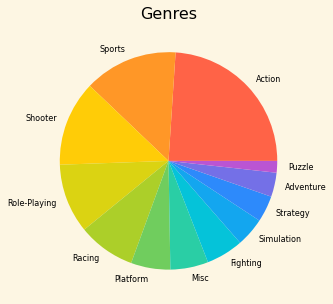

In [10]:
dataExt['Genre'].value_counts().plot(kind='pie', title='Genres', ylabel = '', colormap=colormap, textprops={'fontsize': 8}, figsize=(5, 5))
plt.show()

Distribution by platform:

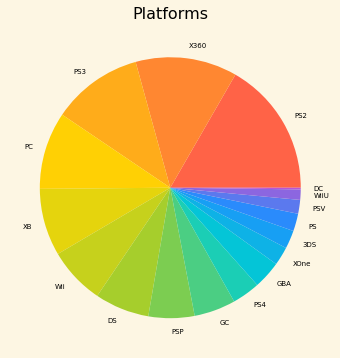

In [11]:
dataExt['Platform'].value_counts().plot(kind='pie', title='Platforms', ylabel = '', colormap=colormap, textprops={'fontsize': 7}, figsize=(6, 6))
plt.show()

### Correlations between cathegorical and numerical data:

Sales in North America, Europe, Japan and rest of the world grouped by genre:

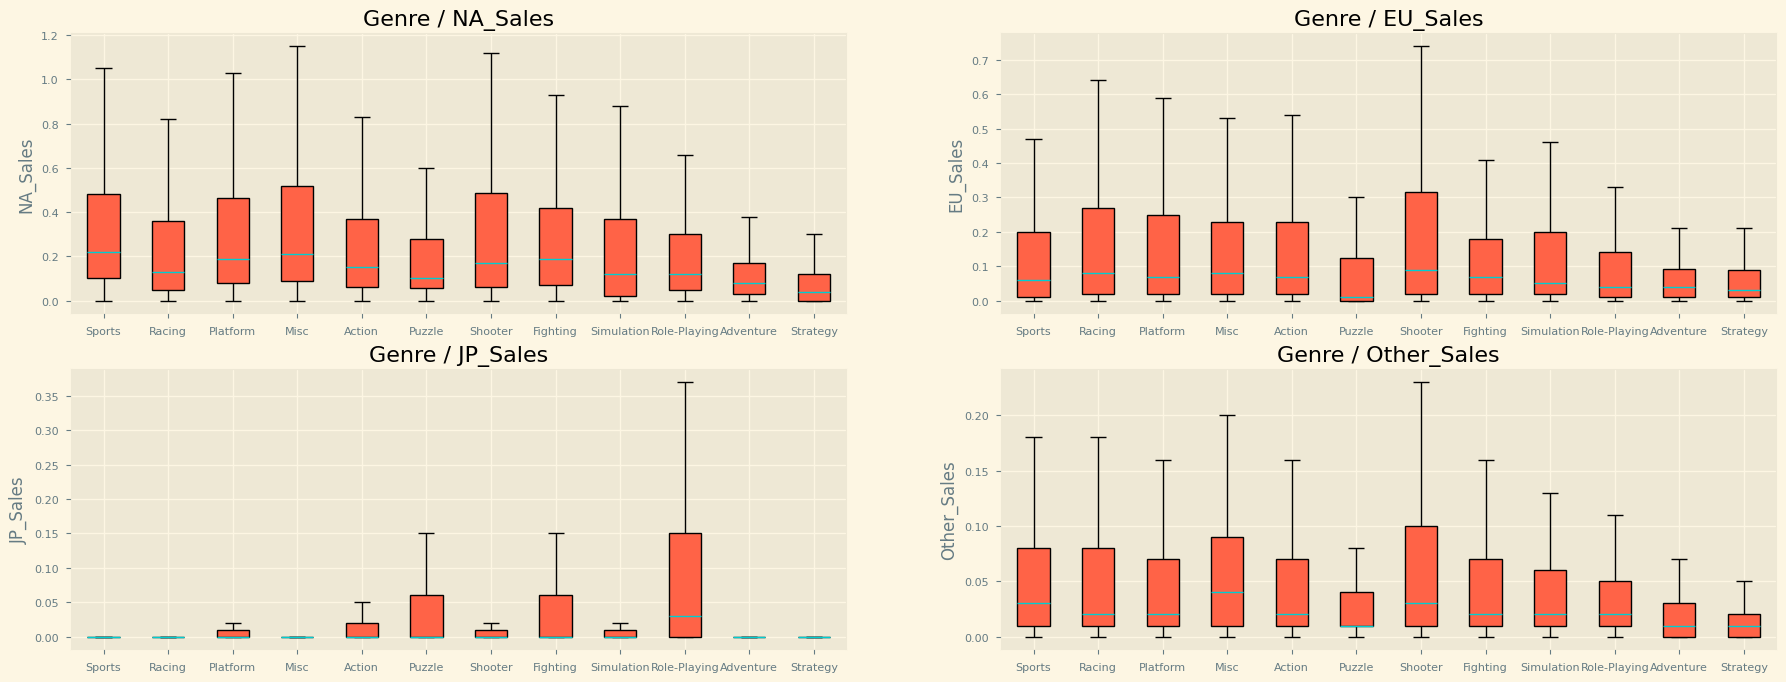

In [190]:
salesCols = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axs = plt.subplots(2, 2, figsize=(22, 8))
for col, ax in zip(salesCols, axs.reshape(-1)):
  ax.boxplot( [dataExt[dataExt.Genre==genre][col] for genre in dataExt.Genre.unique()] , vert=True, patch_artist=True, labels=dataExt.Genre.unique(), showfliers=False) 
  ax.set_title("Genre / " +col)
  ax.set_ylabel(col)
plt.show()

Sales grouped by platform:

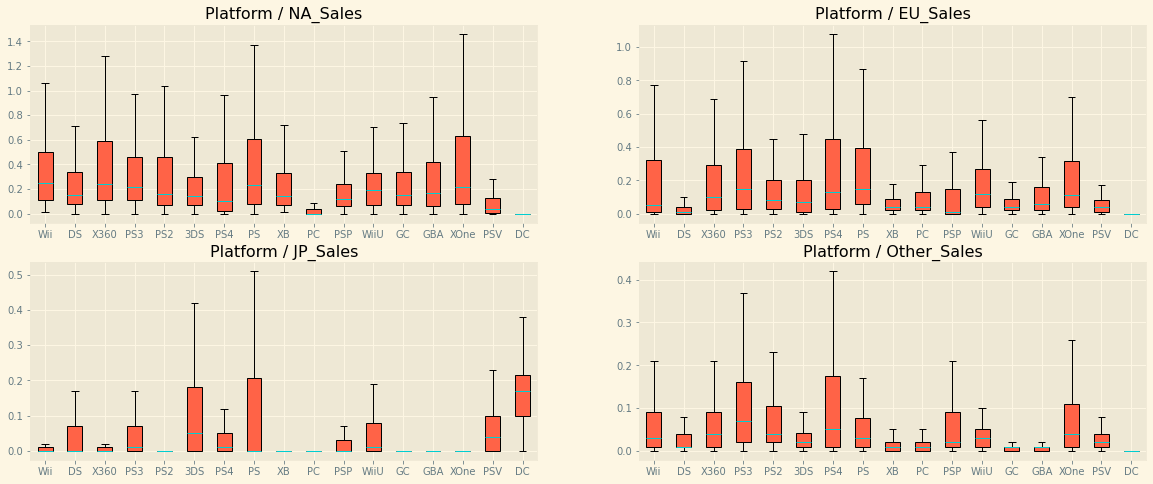

In [13]:
salesCols = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axs = plt.subplots(2, 2, figsize=(20, 8))
for col, ax in zip(salesCols, axs.reshape(-1)):
  ax.boxplot( [dataExt[dataExt.Platform==platform][col] for platform in dataExt.Platform.unique()] , vert=True, patch_artist=True, labels=dataExt.Platform.unique(), showfliers=False) 
  ax.set_title('Platform / '+col)
plt.show()

Total amount of sales of 10 publishers who made best selling games:

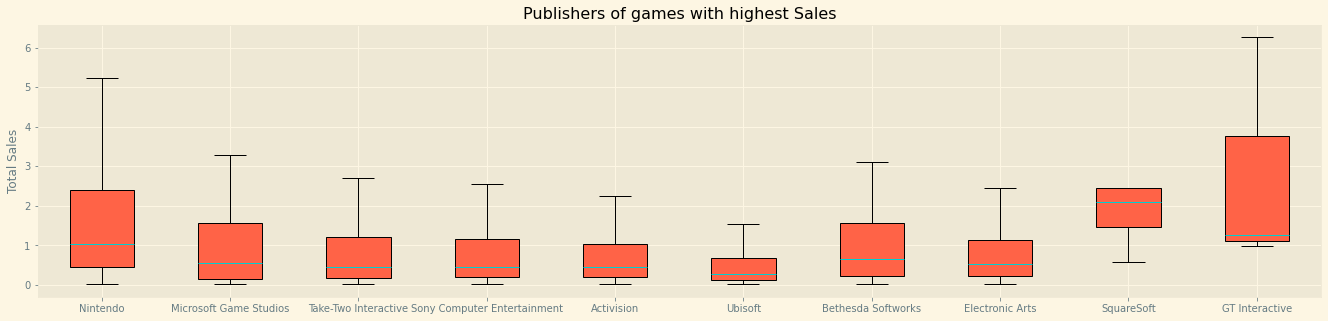

In [15]:
publishers = dataExt.Publisher.unique()
m = { 
    'Publisher' : publishers, 
    'Max' : [dataExt[dataExt.Publisher==publisher][salesCols].sum(axis=1).max() for publisher in publishers]
     }
m = pd.DataFrame(m)

publishers = m.nlargest(10, 'Max')['Publisher']

plt.figure(figsize=(23, 5))
plt.boxplot( [dataExt[dataExt.Publisher==p][salesCols].sum(axis=1) for p in publishers] , vert=True, patch_artist=True, labels=publishers, showfliers=False) 
plt.title('Publishers of games with highest Sales')
plt.ylabel('Total Sales')
plt.show()

Critic Score of 10 publishers of games with highest Critic Score:

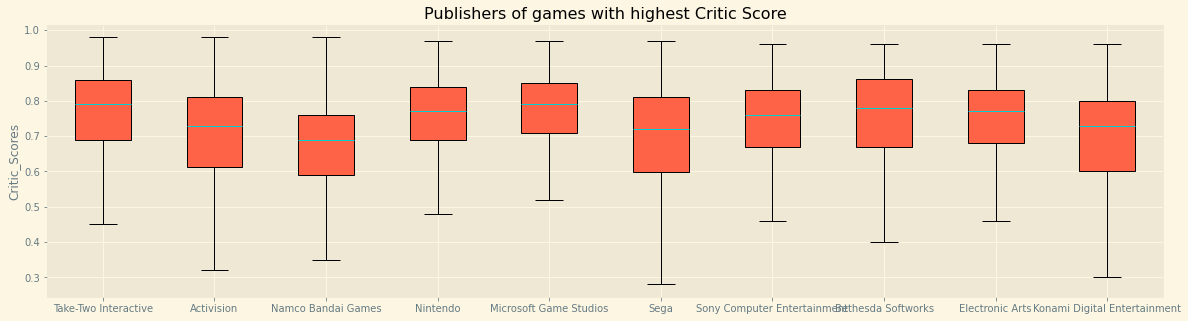

In [19]:
publishers = dataExt.Publisher.unique()
m = { 
    'Publisher' : publishers, 
    'Max' : [dataExt[dataExt.Publisher==publisher]['Critic_Score'].max() for publisher in publishers]
     }
m = pd.DataFrame(m)

publishers = m.nlargest(10, 'Max')['Publisher']

plt.figure(figsize=(20, 5))
plt.boxplot( [dataExt[dataExt.Publisher==p]['Critic_Score'] for p in publishers] , vert=True, patch_artist=True, labels=publishers, showfliers=False) 
plt.title('Publishers of games with highest Critic Score')
plt.ylabel('Critic_Scores')
plt.show()

## **Numerical data**

In [ ]:
numericColumns = ['Year_of_Release', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Rating']

Distribution of games by rating:

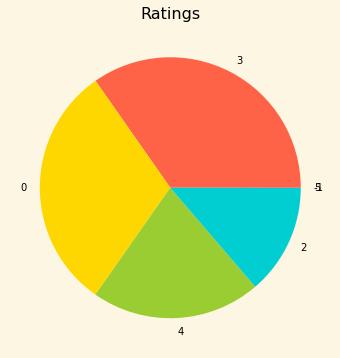

In [ ]:
dataExt['Rating'].value_counts().plot(kind='pie', title='Ratings', ylabel = '', colormap=colormap, textprops={'fontsize': 10}, figsize=(6, 6))
plt.show()

Drawing pairplot to look for correlations:

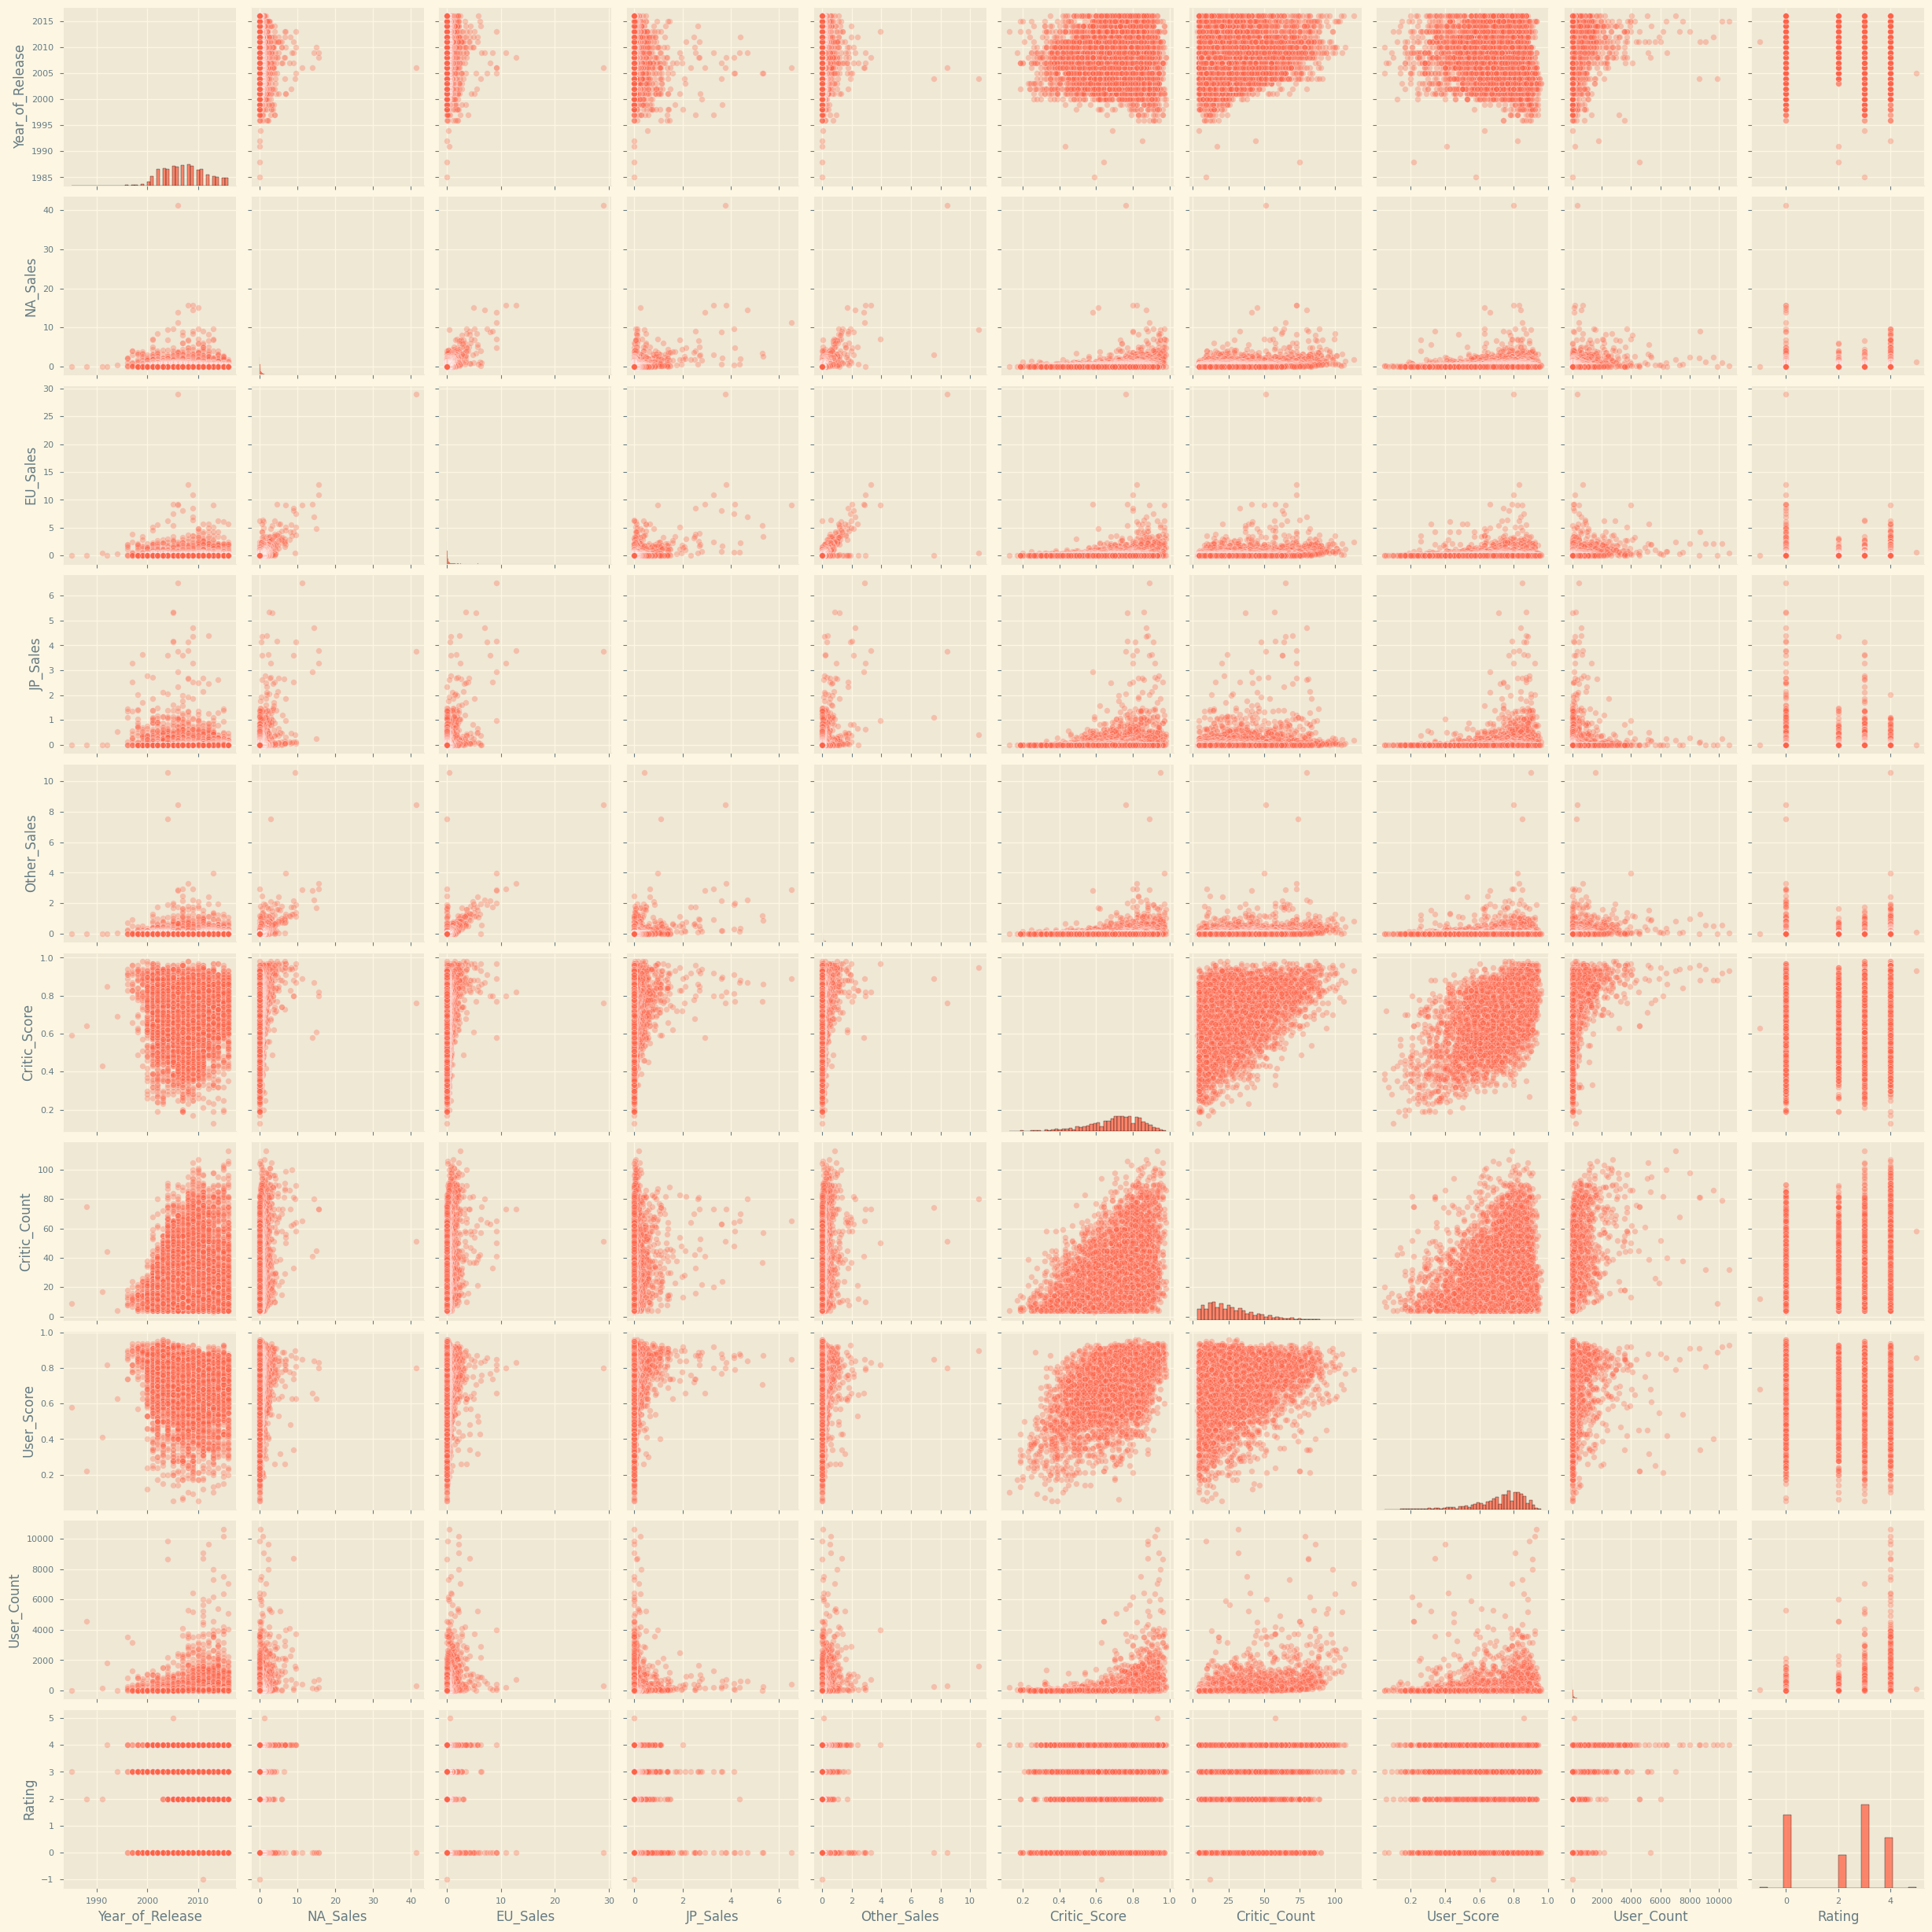

In [207]:
sns.pairplot( dataExt[numericColumns],  plot_kws=dict(alpha=0.3))
plt.show()

### **Observations with additional visualisation** 

1. Number of users who left a review is significantly bigger for games with rating 4 (which here is code for rating M - Mature).

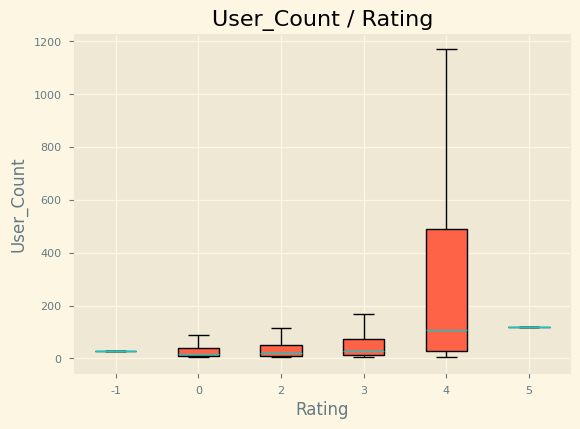

In [213]:
ratings = dataExt.Rating.unique()
ratings.sort()
plt.boxplot( [dataExt[dataExt.Rating==r]['User_Count'] for r in ratings] , vert=True, patch_artist=True, labels=ratings, showfliers=False) 
plt.title('User_Count / Rating')
plt.ylabel('User_Count')
plt.xlabel('Rating')
plt.show()

2. Number of reviews of both critics and users seem to be increasing over time. Reviews of critics dropped a little bit around 2007 and 2013, whereas user reviews are lower in the last two years.

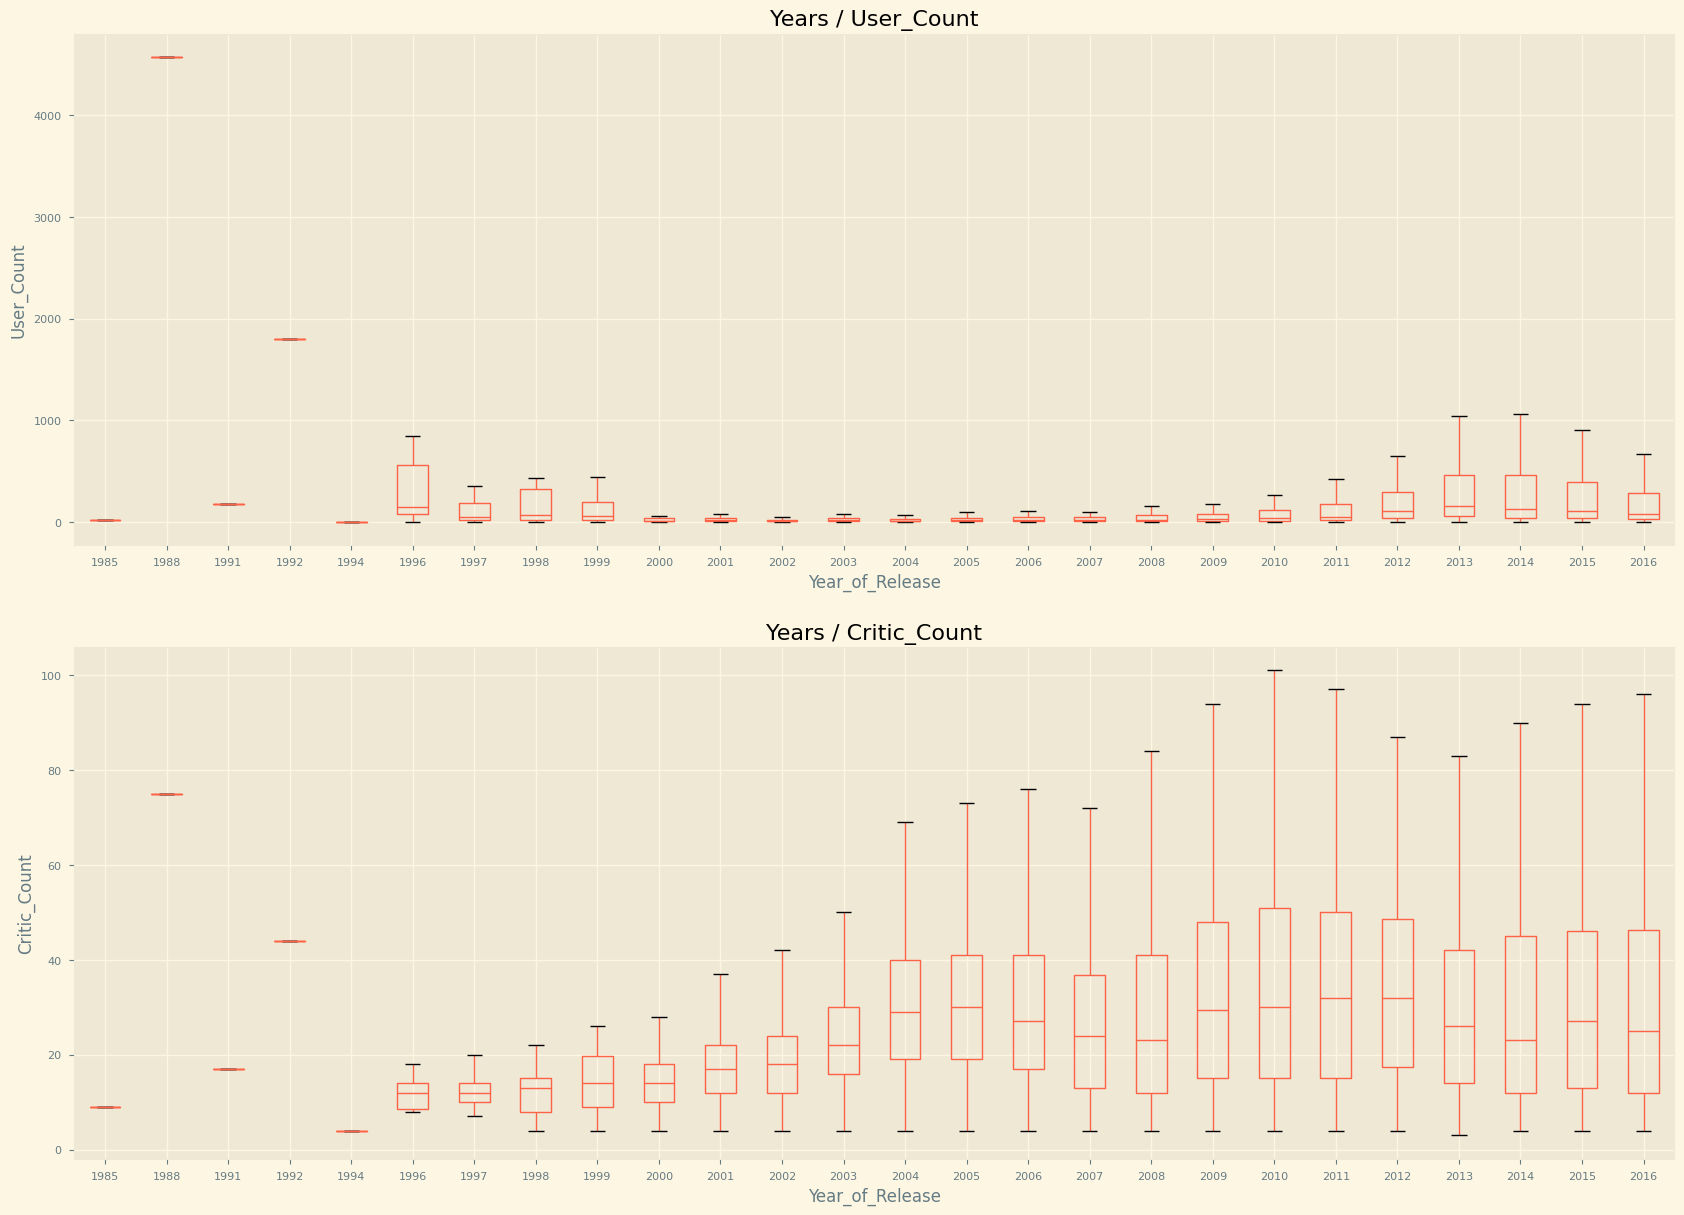

In [220]:
fig, axs = plt.subplots(2, 1, figsize=(20, 15))
cols = ['User_Count', 'Critic_Count']
for ax, col in zip(axs, cols):
  dataExt.boxplot(col, 'Year_of_Release', ax=ax, showfliers=False)
  ax.get_figure().suptitle('')
  ax.set_title('Years / '+col)
  ax.set_ylabel(col)
plt.show()

Before 1996 plot shows only medians due to the fact that there are only few of games from that time.

In [216]:
dataExt[dataExt.Year_of_Release < 1996]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1009,Battle Arena Toshinden,PS,1994,Fighting,Sony Computer Entertainment,0.39,0.26,0.53,0.08,0.69,4,0.63,4,Tamsoft,3
2550,Sonic the Hedgehog,PS3,1991,Platform,Sega,0.00,0.48,0.00,0.00,0.43,17,0.41,176,Sonic Team,2
6470,Alter Ego,PC,1985,Simulation,Activision,0.00,0.03,0.00,0.01,0.59,9,0.58,19,"Viva Media, Viva Media, LLC",3
6499,Doom,PC,1992,Shooter,id Software,0.02,0.00,0.00,0.00,0.85,44,0.82,1796,id Software,4
6501,SimCity,PC,1988,Simulation,Maxis,0.00,0.02,0.00,0.01,0.64,75,0.22,4572,Maxis,2


SimCity from 1988 is especially visible in the User_Count plot with value 4572. After 1996 there are also games with higher values but they do not have such impact on the way the plot above looks. They can become visible after showing outliers on the plot:

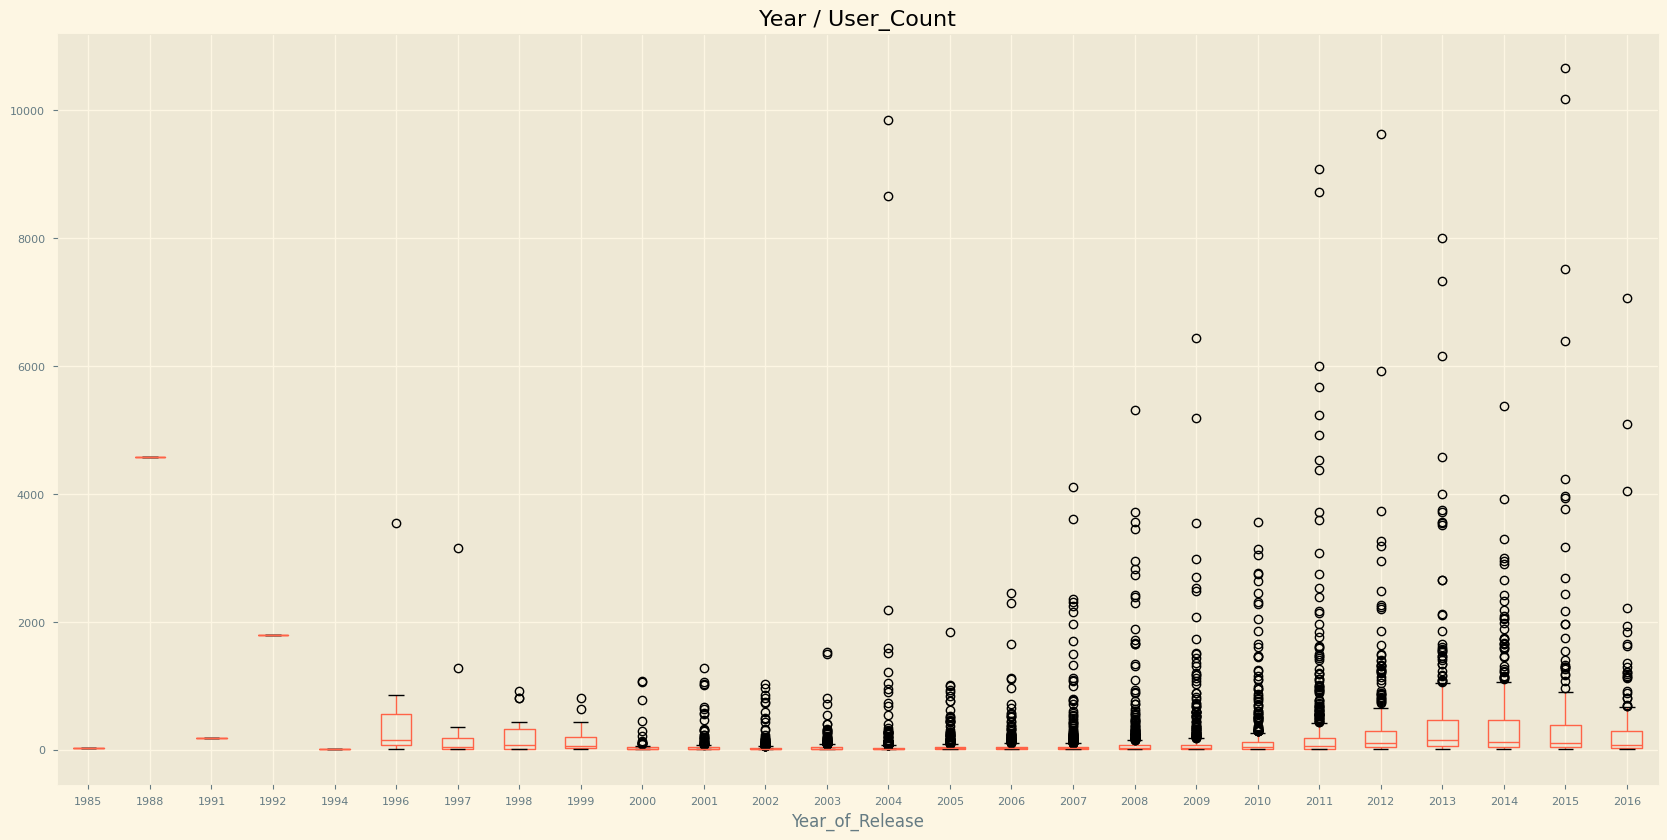

In [219]:
dataExt.boxplot('User_Count', 'Year_of_Release', showfliers=True, figsize=(20, 10))
plt.suptitle('')
plt.title('Year / User_Count')
plt.show()

3. Games most reviewed by users have rather low sales in Japan, whereas those with high sales in Japan are less reviewed.

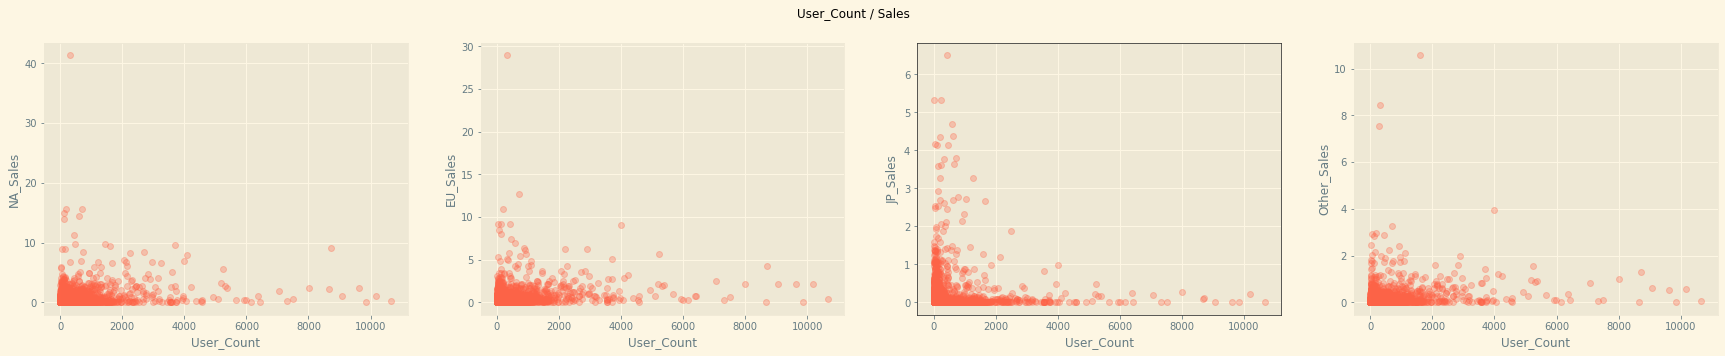

In [37]:
salesCols = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axs = plt.subplots(1, len(salesCols), figsize=(30, 5))
for col, ax in zip(salesCols, axs):
  ax.scatter(dataExt['User_Count'], dataExt[col], alpha=0.3)
  ax.set_ylabel(col)
  ax.set_xlabel('User_Count')

for pos in [ 'bottom', 'top', 'left', 'right']:
  axs[2].spines[pos].set(color='0.2')

fig.suptitle('User_Count / Sales')
plt.show()

4. Games most reviewed by users have high critic scores.

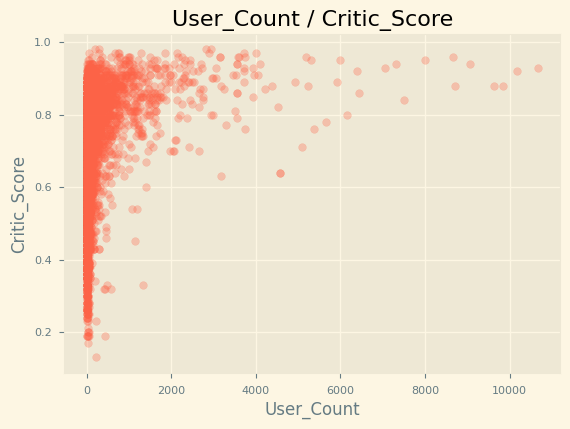

In [221]:
plt.scatter(dataExt['User_Count'], dataExt['Critic_Score'], alpha=0.3)
plt.title('User_Count / Critic_Score')
plt.ylabel('Critic_Score')
plt.xlabel('User_Count')
plt.show()

5. Relations between User_Score and Critic_Count look similar torelations between Critic_Score and Critic_Count.

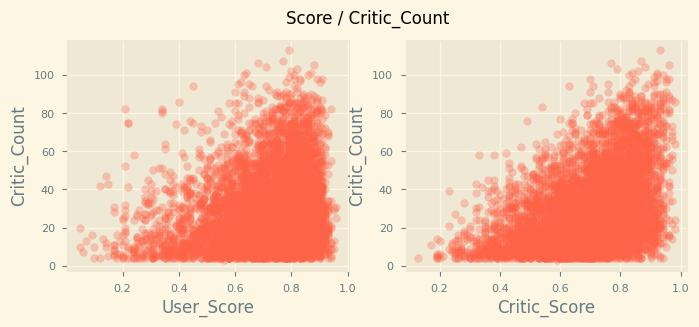

In [230]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
for ax, col in zip(axs, ['User_Score', 'Critic_Score']):
  ax.scatter(dataExt[col], dataExt['Critic_Count'], alpha=0.3)
  ax.set_ylabel('Critic_Count')
  ax.set_xlabel(col)

fig.suptitle('Score / Critic_Count')
plt.show()

6. Critic_Score and User_Score seem slightly correlated. Histogram shows that there are more User_Scores similar to Critic_Scores especially near the score 0.86. With that point being a center histogram creates nearly eliptical shapes with major axis on the diagonal of the plot. 

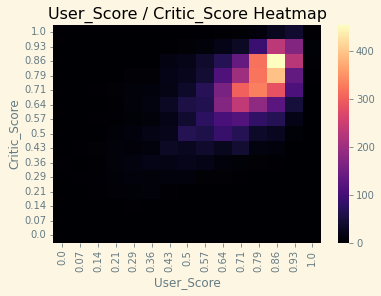

In [39]:
bins = 15
hist, xedges, yedges = np.histogram2d(dataExt['Critic_Score'], dataExt['User_Score'], bins=bins, range=[[0, 1], [0, 1]])
labels = np.around(np.linspace(0, 1, bins), 2)
hist = pd.DataFrame(hist, index = labels, columns = labels)
hist = hist.reindex(index=hist.index[::-1])

sns.heatmap(hist, cmap='magma')
plt.xlabel('User_Score')
plt.ylabel('Critic_Score')
plt.title('User_Score / Critic_Score Heatmap')
plt.show()

## +